<a href="https://colab.research.google.com/github/akash-yede/Twittorials/blob/master/Automated_page_content_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><strong>Automated page content classification<strong><center></h1>

If you want to get insights of what topics your competitors are working, the automated page content classification is a great technique to acheive this. You can enter all the URLs in the excel sheet and the following script runs through each web page to classify the text on the basis of candidate labels that you enter.

First, upload the excel file containing URLs.Read the excel data and fetch the URLs.

In [11]:
from google.colab import files
#Code for importing files in colab
uploaded = files.upload()

Saving URL sheet.xlsx to URL sheet.xlsx


In [13]:
import pandas as pd
ex_data = pd.read_excel('URL sheet.xlsx')
ex_data.head()

,URL
0,www.example1.com/blog-post-1
1,www.example2.com/blog-post-2
2,www.example3.com/blog-post-3
3,www.example4.com/blog-post-4
4,www.example5.com/blog-post-5


In [3]:
list_url = ex_data['URL'].values.tolist()

Install the transformers library for setting the classifier as **zero-shot-classification** and BeautifulSoup library to scrape the web page content.

In [ ]:
!pip install transformers==3.1.0

In [5]:
import requests
from bs4 import BeautifulSoup
from transformers import pipeline
classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# Scrape through each URL from the list of URLs.
for url in list_url:
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  results = soup.findAll("p")
  res_str = str(results)

Enter each label to form a list of candidate labels. These labels will be used to classify the text.
To add more such labels, click on the three dots on the code block, select Form and click Add Form Field. Replace the variable_name with the new label name.

In [7]:
label_1    = "crawl"           #@param {type:"string"}
label_2    = "data"            #@param {type:"string"}
label_3    = "sales"           #@param {type:"string"}
label_4    = "analyze"        #@param {type:"string"}
label_5    = "marketing"       #@param {type:"string"}

If you add additional labels in the above block, you should add them in the below list.

In [8]:
candidate_labels = [label_1, label_2, label_3, label_4, label_5]

In [ ]:
#The classifier method here will classify the scrapped text.
classifier_zeroshot = classifier(res_str, candidate_labels)
print(classifier_zeroshot)

We will now plot a graph to find the scores of each labels.

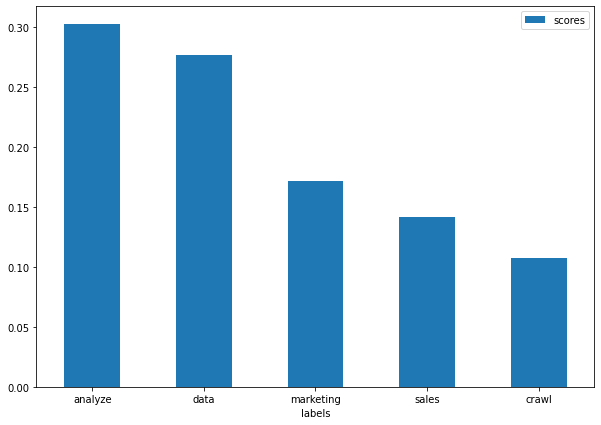

In [10]:
import matplotlib.pyplot as plot
classifier_df = pd.DataFrame(classifier_zeroshot)
classifier_df.plot.bar(x="labels", y="scores",  rot=360, figsize=(10,7));